# **Final Project Proposal:**<br>
# **Solving Research Problems with Machine Learning**
<br>Name: Frances LeMond, 
<br>University: North Carolina State University, Spring of 2024

**Tools and Imports**

In [5]:
#Tools used throughout analysis:
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile as zip
import matplotlib.cm as cm
import matplotlib.pyplot as plt

#Graphing & Processing tools:
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
pd.options.display.max_columns = None
from sklearn.metrics import silhouette_samples, silhouette_score

#Model:
from sklearn.cluster import KMeans #Kmeans Analysis

In [6]:
# Dataset from the World Bank Data-Bank
file2016 = r'C:\Users\lemon\OneDrive\Software Engineering & Data Analysis\2016 World Bank Data.csv'
dfa = pd.read_csv(file2016)   #Data Frame df2016 will be used throughout the code and edited.

#structure of dataframes is: Country Name & Code, Series Name (Feature) & Series Code, and 2016 (2016 Value Correlating to Feature)

# **Introduction**

**K-means Cluster Analysis of Nations Model**

_Why use unsupervised commputational means to cluster nations?_<br> 

Social scientist in international studies often struggle to label countries and their developement levels. Often the labels of 'developed' and 'undeveloped', 'first world' vs. 'second world', and 'third world' or even 'Capitalist' vs 'Socialist' are politically charged and bias. I'm curious if there are other ways we can label countries that put similar countries together so that as social scientists we can work with these groups and reasearch clusters indiviually. The beenfit of this would be three fold; first, not using political labels will help gather support for policy and research creating more diverse teams and thus more diverse and creative insights. Second, similar nations provide case study examples and will have insights for other nations suffering or benefiting from the same conditions. In addition, this clustering research can help get rid of the general 'wealth' formulas and sterotypes that we have today. For example, free markets econoimics movement which requires infinate skilled labor, free markets, and democracy for a country to develope economically. Thirdy, new innovation is neccessary for progress and having a new way of thinking about the world's organization can prompt insights and curiosity. This project will further theory and reseach within the humanities.

**Data**<br>
The data would be from the World Bank DataBank on Developement Indicators from the year 2016. Found at https://databank.worldbank.org/source/world-development-indicators. 

**Technicalities of the data includes:** <br> 
Deminsions (323769, 5) <br>
The original Columns are Country Name, Country Code, Series Name, Series Code, and 2016 [YR2016]. For the purposes of this project I will keep Country Name, Series Name (Variable), 2016 [YR2016] which contains the values of the Series Name. The country names will be the index so that I can look up nations by their names and so the K-Means model will not use the names within the analysis.
<br>Through preprocessing procedures explained below, I will also be reducing the number of series names/variables for the K-Means. This is because the more variables/features the less effective the K-Means analysis due to the _'curse of deminsionality'_; a term used to explain how using more features in theory should make the model work better but in reality streches and distorts the data so that the model is ineffective and hard to visualize.

# **K-Means Cluster Model**

**Processing the Dataset**

*The methods for preprocessing the data are to give more descriptive feature names, selecting well documented features, dropping repetitive features, and imputing median values into NaN vlaues where approprate.*

This pre-processing includes filtering out features that have less than 95% of the data for nations, and nations that have less than 95% of the data for the features. Additionally, I have replaced ".." with NaN and changed the character type of the response values to numeric to allow for numeric calulations. The end Data Frame has Nation's Names as the index so that the K-Means analysis does not use Nation's Name as a feature and Features are listed as columns with corresponding values in each row for each nation. K-Means does not allow for missing values so median was chosen for the imputing statement. Median was choosen over mean because means can be effected by outliers and this data set has several outliers for each feature, therefore when imputing for this analysis it is more accurate to use median.

It is notable that for K-Mean's anlaysis normalizing the data is not standard and is more often seen with Logistic Regression Models. However, during the exploratory data analysis, I found that by using a procedure called 'RobustScaler()' from sklearn to normalize data led to the K-Means model preforming better. This is because by normalizing the data so that larger nations with much higher total population and agricultural land would not be clustered as outliers. Meaning the K-Means cluster analysis could instead utilize other features to create clusters. The intention is to decrease the weight of varibales like total popualtion and agricultural acres so that they influence the clusters but do not dominate the reasoning for them. Without using this robust scaler, China, Japan, and the Uninted States will be sorted into their own clusters, making for poor insights due to less clusters with similar nations. Using the scaler is the best option for creating diverse clusters.

In [7]:
df2016 = dfa.copy()
df2016.rename(columns ={'2016 [YR2016]': '2016', 'Series Name': 'Parameter'}, inplace= True)   #replaces YR 2016 and series name columns.
df2016.drop(columns= ['Series Code', 'Country Code'], inplace = True)   #drops code columns which hold no value to this analysis.
df2016.replace('..', 'NaN', inplace = True)   #replaces '..' with NaN so that I may accurately count missing vlaues.
df2016.dropna(how='all', inplace = True)   #drops rows where all variables are NAN in the observation because fully NaN rows will error out the pivot.
df2016['2016'] = pd.to_numeric(df2016['2016'], errors='coerce')   #changes response values to a numeric type.
df2016 = df2016.pivot(index='Country Name', columns='Parameter', values='2016') #Creates a DF where columns (x1493) are the features/series questions and the countries are the the index (x219)

Reducing features (varibales) in the dataset to reduce _'the curse of deminsionality'_:

In [8]:
df2016.dropna(axis=1, thresh=208, inplace = True)   #drops columns (developement features) that don't have information for at least 208 of the 219 nations (roughly 95%)
df2016.shape   #Check: should be 219 countries and 116 parameters.

(219, 116)

In [9]:
df2016.dropna(axis=0, thresh=110, inplace = True)   #drops rows (nations) that don't have values for at least 110 of the 116 parameters (roughly 95%)
df2016.shape   #Check: should be 202 nations and 116 parameters.

(202, 116)

In [10]:
#Dropping repeatitive Features & Keeping Selected Columns:
columns_to_keep0 = ['Access to electricity (% of population)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)', 'Fertility rate, total (births per woman)', 'GDP growth (annual %)', 'Incidence of tuberculosis (per 100,000 people)', 'Life expectancy at birth, total (years)',
       'People practicing open defecation (% of population)', 'People using at least basic drinking water services (% of population)', 'People using at least basic sanitation services (% of population)',
       'Population ages 15-64 (% of total population)','Population ages 65 and above (% of total population)', 'Population growth (annual %)', 'Primary education, duration (years)',
       'Renewable energy consumption (% of total final energy consumption)','Rural population (% of total population)','Secure Internet servers (per 1 million people)', 'Terrestrial and marine protected areas (% of total territorial area)',
       'Terrestrial protected areas (% of total land area)','Total natural resources rents (% of GDP)', 'Agricultural land (sq. km)', 'Capture fisheries production (metric tons)', 'GDP (current US$)',
       'Net migration', 'Population ages 15-64, total', 'Population, total','Land area (sq. km)', 'Surface area (sq. km)', 'Urban population']
df2016 = df2016[columns_to_keep0]

Imputing medians into NaN values:

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median') #creating imputer statement, imputing uses median vlaues.
imputer.fit(df2016)
df2016 = pd.DataFrame(imputer.transform(df2016), columns = df2016.columns, index = df2016.index)
df2016.isnull().any().any()   #Check: if returns false, there are no more Null values.

False

Scaling large vairbales for better analysis:

In [12]:
RobustScaler = preprocessing.RobustScaler()   # Scaler Statement.
columns_to_normalize = ['Agricultural land (sq. km)', 'Capture fisheries production (metric tons)', 'GDP (current US$)', 'Net migration', 'Population ages 15-64, total', 'Population, total', 'Land area (sq. km)', 'Surface area (sq. km)', 'Urban population']
data16 = df2016[columns_to_normalize].values   # Makes a numpy array of columns.
data16_scaled = RobustScaler.fit_transform(data16)
data16_scaled_df = pd.DataFrame(data16_scaled, columns = columns_to_normalize)   #takes normalized values and puts them back into dataframe structure with columns names.
data16_scaled_df = data16_scaled_df.set_index(df2016.index)
data16_scaled_df.head()

,Agricultural land (sq. km),Capture fisheries production (metric tons),GDP (current US$),Net migration,"Population ages 15-64, total","Population, total",Land area (sq. km),Surface area (sq. km),Urban population
Country Name,,,,,,,,,
Afghanistan,2.150620,-0.168537,-0.047023,-3.197800,1.021866,1.204051,1.224635,1.115167,0.487529
Albania,-0.113373,-0.144604,-0.082949,-0.378136,-0.175021,-0.178411,-0.158168,-0.165456,-0.217336
Algeria,2.363296,0.225269,0.768062,-1.278569,1.637786,1.452298,5.052193,4.662690,2.521697
Andorra,-0.185054,-0.176164,-0.134436,0.055025,-0.317249,-0.300445,-0.217767,-0.223485,-0.380415
Angola,2.638452,1.776674,0.151957,3.264462,0.801848,0.965452,2.540249,2.333678,1.500219


In [13]:
df2016.drop(columns=columns_to_normalize, inplace = True)
df2016 = pd.concat([df2016, data16_scaled_df], axis = 1)

# **Results** for _K-Means of K = 7_

The results of the K-Means analysis using 7 clusters resulted in some exciting and unusual paring of nations. One case study is the cluster 5, where Iceland & Seychelles are paired together. 

At first a seemingly unusual paring concidering Seychelles is a tropical island nation by the African Continent while Iceland is a freezing Eurpoean nation. However, upon closer inspections, it become apparent as to why; both nations have very similar crude death rates, working populations of 15-64, annual population growth, urban populations, primary education duration, large protected natural lands, and total populations. This case study pairing was made despite large differences in adolecent birth rates, sanitary differences, renewable energy uses, and tuberculosis cases. Below is a dataframe of both nations and despite the appent difference, it is important to keep in mind that this pairing was made out of 200+ nations so while they are not exactly the same the similarities are impressive given the bigger picture. The goal of this model is to find similar trends in nations so that case studies of comparison can be preformed and hopefully, generate new insights can be made. 

In [14]:
casestudy_IS = ['Iceland', 'Seychelles']
cluster_df = df2016.loc[casestudy_IS]
cluster_df.head()

,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",GDP growth (annual %),"Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Primary education, duration (years)",Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Secure Internet servers (per 1 million people),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total natural resources rents (% of GDP),Agricultural land (sq. km),Capture fisheries production (metric tons),GDP (current US$),Net migration,"Population ages 15-64, total","Population, total",Land area (sq. km),Surface area (sq. km),Urban population
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Iceland,100.0,6.709,51.060543,12.0,6.9,1.74,6.303687,2.1,82.204878,0.000000,100.000000,98.782664,66.198654,13.931502,1.388081,7.0,80.77,6.265,35663.712329,2.421747,17.44,0.000252,-0.070821,4.18119,-0.031650,0.154875,-0.304599,-0.289002,0.003055,-0.013102,-0.355149
Seychelles,100.0,58.209,43.436960,17.4,7.9,2.39,5.104827,14.0,74.309756,0.847415,95.917068,99.152585,69.716989,6.952646,1.337635,6.0,1.21,44.169,30947.326172,0.051367,42.10,0.099033,-0.186119,0.33583,-0.142693,0.017643,-0.316217,-0.299482,-0.217789,-0.223505,-0.381541


In [15]:
k=7
kmeans = KMeans(n_clusters= k)
kmeans.fit(df2016)

KMeans(n_clusters=7)

In [16]:
y_prediction_2016 = kmeans.predict(df2016)
y_predlist = list(y_prediction_2016)

df2016_results= df2016.copy()
df2016_results['Cluster Label'] = [x + 1 for x in y_predlist]  #add y prediciton as column to the df2016 results data frame. + 1 so that clusters start at label 'Cluster 1' instead of 0.
df2016_results = df2016_results.reset_index()   #making the country names a column called Country Name and resetting the index

In [17]:
# Create empty lists for clusters 1-14
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []

# Sorting nations into readable clusters
for i, row in df2016_results.iterrows():
    if row['Cluster Label'] == 1:
        cluster1.append(row['Country Name'])
    elif row['Cluster Label'] == 2:
        cluster2.append(row['Country Name'])
    elif row['Cluster Label'] == 3:
        cluster3.append(row['Country Name'])
    elif row['Cluster Label'] == 4:
        cluster4.append(row['Country Name'])
    elif row['Cluster Label'] == 5:
        cluster5.append(row['Country Name'])
    elif row['Cluster Label'] == 6:
        cluster6.append(row['Country Name'])
    elif row['Cluster Label'] == 7:
        cluster7.append(row['Country Name'])

# Printing clusters
print('cluster1:', cluster1)
print('cluster2:', cluster2)
print('cluster3:', cluster3)
print('cluster4:', cluster4)
print('cluster5:', cluster5)
print('cluster6:', cluster6)
print('cluster7:', cluster7)

cluster1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon', 'Le

# **Visualizing** _K-Means of 7_

In [18]:
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(df2016) #makes the dataframe able to be visualized on a 2D Graph.
x=tSNE_result[:,0]
y=tSNE_result[:,1]

kvisual = pd.DataFrame(df2016_results) #includes the labeling for the K Means
kvisual['TSNE X']=x
kvisual['TSNE Y']=y

karray = [2,3,4,5,6,7,8,9,10,12,13,14,15]
inertia_array = []
silhouette_array = []

for k in karray:
  kmeans = KMeans(n_clusters = k)
  y_pred = kmeans.fit_predict(df2016)
  inertia_array.append(kmeans.inertia_)
  silhouette_array.append(silhouette_score(df2016, kmeans.labels_)) 

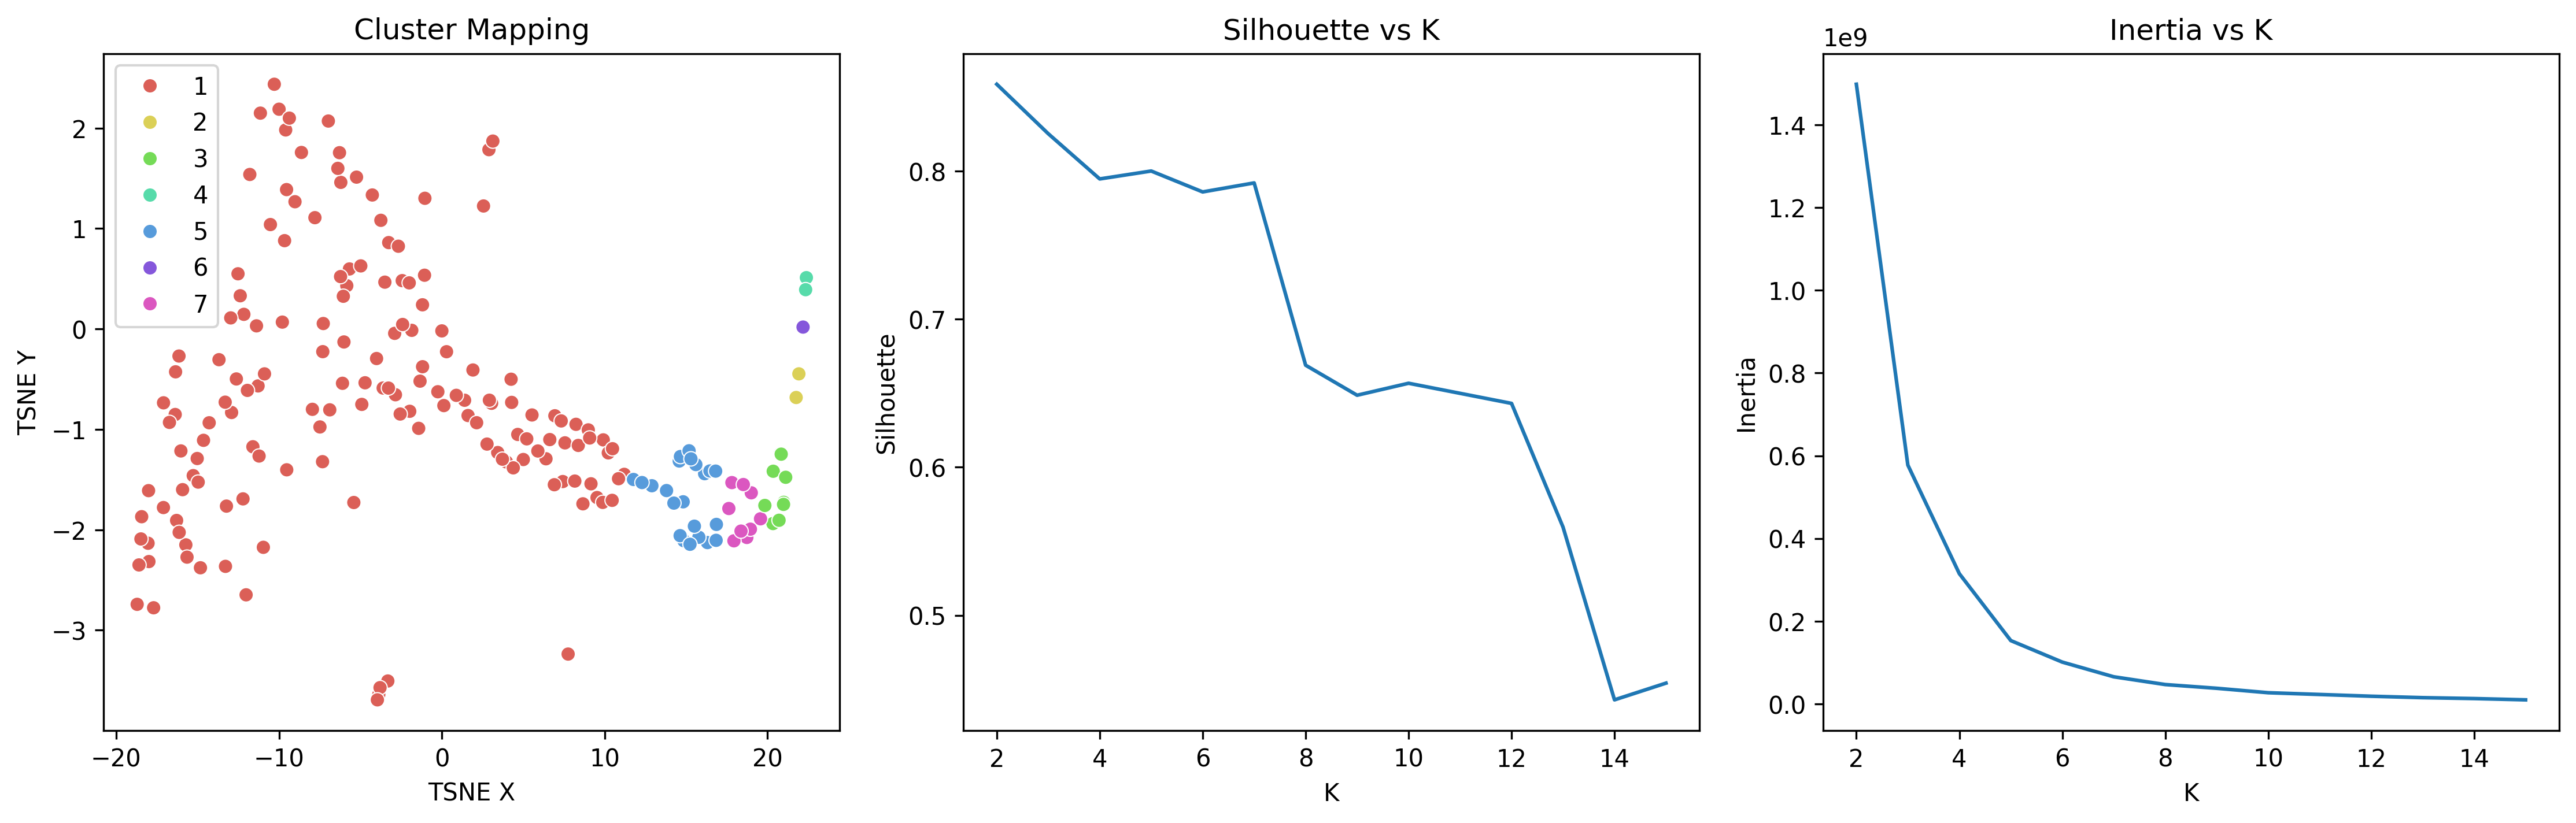

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), dpi=300)

#Cluster Map
Kmap = sns.scatterplot(x='TSNE X', y='TSNE Y', hue='Cluster Label', palette=sns.color_palette("hls", 7), data=kvisual,legend="full", ax=axs[0])
Kmap.set(title= "Cluster Mapping")
Kmap.legend(loc= "upper left")

#Silhouette 
Silhouette_graph = sns.lineplot(x = karray, y = silhouette_array, ax=axs[1])
Silhouette_graph.set(xlabel= 'K', ylabel = 'Silhouette', title = 'Silhouette vs K')

#Inertia
Inertia_graph = sns.lineplot(x=karray, y= inertia_array, ax=axs[2])
Inertia_graph.set(xlabel = 'K', ylabel = 'Inertia', title = 'Inertia vs K')

plt.subplots_adjust(wspace=5.0) #Spacing for graphs
plt.tight_layout()
plt.show()

# **Results** for _K-Means of K = 12_

With a larger K value came lower inertia and shilloutte value showing that this method results in more efficient and effective clusters. In this study the clusters were larger with few outliers in their own clusters. One such cluster I investigates was cluster 11: Andorra, Belgium, Curacao, Faroe Islands, Greenland, Isle of Man, Latvia, Malta, Poland, Portugal, Romania, Slovak Republic, and Spain. With the report below, we can see that despite being a large cluster the nations have a tremendous amount of similarities. Additionally, despite the model not having access to location, all but Curacao are european nations. 

This case study similarities are working populations, life expectancy, high basic sanitation, large retierment popualtions (ages 65 and over, roughly 20% of population), most nations have little agricultural land with the only visible difference being that the nations tend to either have high fishery production or little to none and renewable energy use.

In [20]:
#Casestudy Report
casestudy_AO = ['Andorra', 'Belgium', 'Curacao', 'Faroe Islands', 'Greenland', 'Isle of Man', 'Latvia', 'Malta', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Spain']
casestudy_AO_df = df2016.loc[casestudy_AO]
casestudy_AO_df.head(13)

,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",GDP growth (annual %),"Incidence of tuberculosis (per 100,000 people)","Life expectancy at birth, total (years)",People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Population ages 15-64 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Primary education, duration (years)",Renewable energy consumption (% of total final energy consumption),Rural population (% of total population),Secure Internet servers (per 1 million people),Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total natural resources rents (% of GDP),Agricultural land (sq. km),Capture fisheries production (metric tons),GDP (current US$),Net migration,"Population ages 15-64, total","Population, total",Land area (sq. km),Surface area (sq. km),Urban population
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andorra,100.0,7.176,39.088835,8.800,4.300,2.203,3.709678,6.3,73.537000,0.000000,99.999996,99.999996,71.895700,12.931397,1.100603,6.0,19.30,11.752,3019.023987,21.190930,21.19,0.000000,-0.185054,-0.176164,-0.134436,0.055025,-0.317249,-0.300445,-0.217767,-0.223485,-0.380415
Belgium,100.0,6.489,54.686784,10.800,9.500,1.680,1.266686,10.0,81.439024,0.000000,100.000000,99.486178,64.646762,18.388947,0.506300,6.0,9.20,2.081,3047.278620,24.578162,23.21,0.030378,-0.102949,-0.067903,2.583129,2.026384,0.224255,0.189634,-0.151795,-0.161804,0.732681
Curacao,100.0,24.765,51.936509,11.200,9.300,1.700,-1.067708,2.7,77.719512,0.272701,99.497752,98.950275,65.816932,13.780642,1.060316,6.0,1.42,10.728,2912.365969,0.258181,15.52,0.000000,0.000000,-0.033525,-0.133701,0.031714,-0.313308,-0.296653,-0.217824,-0.223538,-0.372493
Faroe Islands,100.0,10.190,61.632653,13.600,7.700,2.625,1.469916,46.0,82.043902,0.591703,100.000000,89.643485,61.868687,17.311111,1.391454,6.0,6.32,58.223,3595.959596,0.023492,2.34,0.000000,-0.180275,2.105612,-0.134915,0.027805,-0.318852,-0.301448,-0.215717,-0.221585,-0.384788
Greenland,100.0,39.965,40.704197,14.800,8.700,2.000,4.681954,119.0,71.825122,0.000000,100.000000,62.500000,71.070892,8.025431,0.128228,6.0,12.37,13.674,2954.472644,22.359979,41.12,0.000000,-0.171229,0.920398,-0.135524,-0.004566,-0.318159,-0.301157,0.689555,0.617761,-0.381980
Isle of Man,100.0,20.414,57.801184,9.359,9.979,1.691,6.952303,46.0,80.314000,0.000000,99.065321,100.000000,63.370661,20.653209,-0.171213,6.0,1.96,47.657,3391.252247,4.294057,3.78,0.000000,-0.183706,-0.147904,-0.111751,0.012526,-0.317195,-0.299970,-0.217545,-0.223280,-0.382467
Latvia,100.0,15.212,54.819786,11.200,14.600,1.740,2.368615,37.0,74.580488,0.000000,98.581364,91.956775,64.591209,20.223985,-0.913885,6.0,38.48,31.979,2938.449236,17.509892,18.17,0.983551,-0.067184,0.282564,0.010222,-0.358699,-0.226899,-0.218307,-0.081093,-0.091907,-0.252384
Malta,100.0,13.123,47.626689,9.800,7.300,1.370,3.381450,12.0,82.453659,0.000000,100.000000,99.964570,67.738532,18.695866,2.288615,6.0,9.24,5.520,3234.831648,6.365391,23.69,0.000000,-0.185575,-0.161864,-0.084059,0.372557,-0.298167,-0.283782,-0.218099,-0.223793,-0.343465
Poland,100.0,12.284,45.141515,10.100,10.200,1.390,2.953509,18.0,77.851220,0.000000,94.026733,98.383104,68.898275,16.108068,-0.042985,6.0,11.34,39.822,2492.488363,38.037148,39.62,2.026247,0.699822,0.699380,2.548449,-0.061172,1.626574,1.349169,0.458818,0.417145,1.918670


In [21]:
k=12
kmeans = KMeans(n_clusters= k)
kmeans.fit(df2016)

KMeans(n_clusters=12)

In [22]:
y_prediction_2016 = kmeans.predict(df2016)
y_predlist = list(y_prediction_2016)

df2016_results= df2016.copy()
df2016_results['Cluster Label'] = [x + 1 for x in y_predlist]  #add y prediciton as column to the df2016 results data frame. + 1 so that clusters start at label 'Cluster 1' instead of 0.
df2016_results = df2016_results.reset_index()   #making the country names a column called Country Name and resetting the index

In [23]:
# Create empty lists for clusters 1-14
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []
cluster11 = []
cluster12 = []

# Sorting nations into readable clusters
for i, row in df2016_results.iterrows():
    if row['Cluster Label'] == 1:
        cluster1.append(row['Country Name'])
    elif row['Cluster Label'] == 2:
        cluster2.append(row['Country Name'])
    elif row['Cluster Label'] == 3:
        cluster3.append(row['Country Name'])
    elif row['Cluster Label'] == 4:
        cluster4.append(row['Country Name'])
    elif row['Cluster Label'] == 5:
        cluster5.append(row['Country Name'])
    elif row['Cluster Label'] == 6:
        cluster6.append(row['Country Name'])
    elif row['Cluster Label'] == 7:
        cluster7.append(row['Country Name'])
    elif row['Cluster Label'] == 8:
        cluster8.append(row['Country Name'])
    elif row['Cluster Label'] == 9:
        cluster9.append(row['Country Name'])
    elif row['Cluster Label'] == 10:
        cluster10.append(row['Country Name'])
    elif row['Cluster Label'] == 11:
        cluster11.append(row['Country Name'])
    elif row['Cluster Label'] == 12:
        cluster12.append(row['Country Name'])

# Printing clusters
print('cluster1:', cluster1)
print('cluster2:', cluster2)
print('cluster3:', cluster3)
print('cluster4:', cluster4)
print('cluster5:', cluster5)
print('cluster6:', cluster6)
print('cluster7:', cluster7)
print('cluster8:', cluster8)
print('cluster9:', cluster9)
print('cluster10:', cluster10)
print('cluster11:', cluster11)
print('cluster12:', cluster12)

cluster1: ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.', '

# **Visualizing** _K-Means of K = 12_

In [24]:
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(df2016) #makes the dataframe able to be visualized on a 2D Graph.
x=tSNE_result[:,0]
y=tSNE_result[:,1]

kvisual = pd.DataFrame(df2016_results) #includes the labeling for the K Means
kvisual['TSNE X']=x
kvisual['TSNE Y']=y

karray = [2,3,4,5,6,7,8,9,10,12,13,14,15]
inertia_array = []
silhouette_array = []

for k in karray:
  kmeans = KMeans(n_clusters = k)
  y_pred = kmeans.fit_predict(df2016)
  inertia_array.append(kmeans.inertia_)
  silhouette_array.append(silhouette_score(df2016, kmeans.labels_)) 

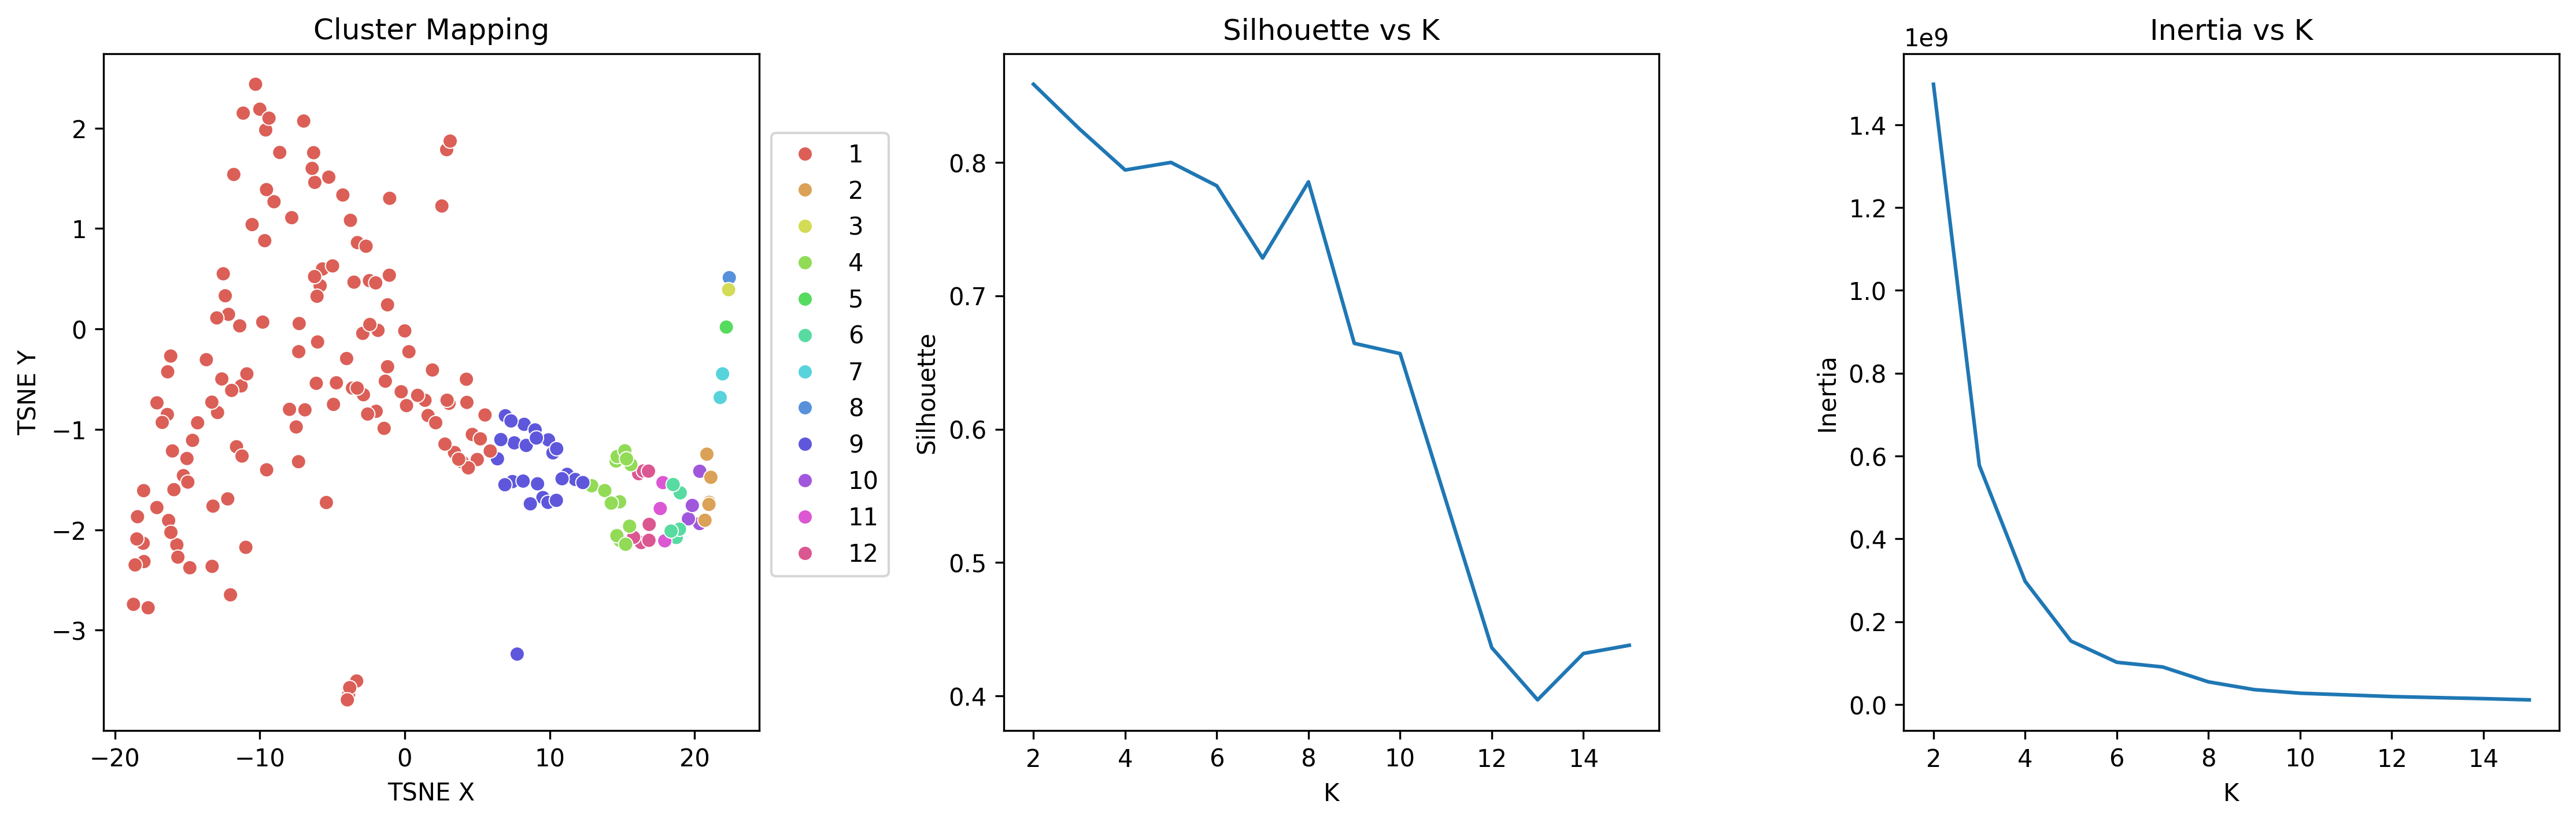

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), dpi=300)

#Cluster Map
Kmap = sns.scatterplot(x='TSNE X', y='TSNE Y', hue='Cluster Label', palette=sns.color_palette("hls", 12), data=kvisual,legend="full", ax=axs[0])
Kmap.set(title= "Cluster Mapping")
Kmap.legend(bbox_to_anchor=(1, 0.9))
    
#Silhouette 
Silhouette_graph = sns.lineplot(x = karray, y = silhouette_array, ax=axs[1])
Silhouette_graph.set(xlabel= 'K', ylabel = 'Silhouette', title = 'Silhouette vs K')
    
#Inertia
Inertia_graph = sns.lineplot(x=karray, y= inertia_array, ax=axs[2])
Inertia_graph.set(xlabel = 'K', ylabel = 'Inertia', title = 'Inertia vs K')

plt.subplots_adjust(wspace=5.0) #Spacing for graphs
plt.tight_layout()
plt.show()

# **Further Analysis** for _K-Means Continued_

**Processing Nations of Interest Data**

In [26]:
df_noi = dfa.copy()

# General Cleaning from Original Analysis:
df_noi.rename(columns ={'2016 [YR2016]': '2016', 'Series Name': 'Parameter'}, inplace= True)   #replaces YR 2016 and series name columns.
df_noi.drop(columns= ['Series Code', 'Country Code'], inplace = True)   #drops code columns which hold no value to this analysis.
df_noi.replace('..', 'NaN', inplace = True)   #replaces '..' with NaN so that I may accurately count missing vlaues.
df_noi.dropna(how='all', inplace = True)   #drops rows where all variables are NAN in the observation because fully NaN rows will error out the pivot.
df_noi['2016'] = pd.to_numeric(df_noi['2016'], errors='coerce')   #changes response values to a numeric type.

Creating the Nations of Interest (NOI) Dataset from the Cluster Analysis of K=7

In [27]:
#Nations of Interest (NOI) from Cluster Analysis of K = 7
nations_oi = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia, Fed. Sts.', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Qatar', 'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'Sri Lanka', 'St. Lucia', 'St. Vincent and the Grenadines', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Viet Nam', 'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']
nations_oi_list = list(nations_oi)
df_noi = df_noi.pivot(index = 'Country Name', columns='Parameter', values='2016')    #Creates a DF where columns are the countries (x219) and the features/series questions (x1493) are the index.
dfnoi = df_noi.loc[nations_oi]   # Beacause Nations were taken from the previous models, we know that they pass the 95% of data test and can simply keep the nations of interest, dropping the rest.
dfnoi.shape   #Check: should be 132 countries and 1493 parameters.

(132, 1493)

In [28]:
dfnoi.dropna(axis=1, thresh= 125, inplace = True)   #drops columns (features) that don't have values for at least 125 of the 132 nations (roughly 95%)
dfnoi.shape   #Check: should be 132 nations and 430 parameters.

(132, 430)

Imputing medians for NaN values:

In [29]:
imputer.fit(dfnoi)
dfnoi = pd.DataFrame(imputer.transform(dfnoi), columns = dfnoi.columns, index = dfnoi.index) #imputes median values in the NaN
dfnoi.isnull().any().any()   #Check: if returns false, there are no more Null values.

False

In [30]:
noi_cols_keep = ['Access to clean fuels and technologies for cooking (% of population)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Agricultural land (% of land area)', 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)','Arable land (hectares per person)', 'Birth rate, crude (per 1,000 people)','Control of Corruption: Percentile Rank', 'Cost to export, border compliance (US$)', 'Current health expenditure (% of GDP)', 'Ease of doing business score (0 = lowest performance to 100 = best performance)', 'Fertility rate, total (births per woman)','Fixed broadband subscriptions (per 100 people)', 'Fixed telephone subscriptions (per 100 people)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'GNI (current US$)', 'Government Effectiveness: Percentile Rank', 'Immunization, measles (% of children ages 12-23 months)', 'Individuals using the Internet (% of population)','Labor force, female (% of total labor force)', 'Labor tax and contributions (% of commercial profits)', 'Land area (sq. km)', 'Life expectancy at birth, total (years)', 'Lifetime risk of maternal death (%)', 'Merchandise exports (current US$)', 'Merchandise imports (current US$)', 'Mobile cellular subscriptions (per 100 people)', 'Net migration', 'Permanent cropland (% of land area)', 'Political Stability and Absence of Violence/Terrorism: Percentile Rank', 'Population ages 0-14 (% of total population)', 'Population ages 65 and above (% of total population)', 'Population growth (annual %)', 'Population, total', 'Primary education, duration (years)', 'Probability of dying among adolescents ages 15-19 years (per 1,000)', 'Regulatory Quality: Percentile Rank', 'Rule of Law: Percentile Rank', 'Secure Internet servers (per 1 million people)', 'Strength of legal rights index (0=weak to 12=strong)', 'Terrestrial and marine protected areas (% of total territorial area)', 'Total fisheries production (metric tons)', 'Urban population (% of total population)', 'Voice and Accountability: Percentile Rank', 'Women Business and the Law Index Score (scale 1-100)']
dfnoi = dfnoi[noi_cols_keep]
noi_norm_cols =['Total fisheries production (metric tons)', 'Land area (sq. km)', 'GDP per capita (current US$)', 'GNI (current US$)','GNI (current US$)', 'Population, total',]

Robust Scaler is a way to minimize distance from outliers in certain features:

In [31]:
RobustScaler = preprocessing.RobustScaler()   # Scaler Statement.
dfnoi_scaling = dfnoi[noi_norm_cols].values   # Makes a numpy array of columns.
dfnoi_scaled = RobustScaler.fit_transform(dfnoi_scaling) 
dfnoi_scaled_df = pd.DataFrame(dfnoi_scaled, columns = noi_norm_cols)   #takes normalized values and puts them back into dataframe structure with columns names.
dfnoi_scaled_df.index = dfnoi.index #sets the index to that of the main dfnoi dataframe.
print(dfnoi_scaled_df.shape) #Check: 132 nations by 6 features.

dfnoi.drop(columns=noi_norm_cols, inplace = True)
dfnoi = pd.concat([dfnoi, dfnoi_scaled_df], axis = 1)   #combinging the normalized dataframe and the main dataframe dfnoi
print(dfnoi.shape)   #Check: 132 Nations (index) and 47 parameters (features)

(132, 6)
(132, 47)


# **Results** of _Further Analysis_

In this further analysis of the largest clsuter in the K-7 Analysis. I have had success in breaking down the cluster further and creating an interesting case study (Cluster: Brazil, Indonesia, Saudi Arabia, Viet Nam) but there is still a somewhat large base cluster of 108 nations. It is my belief that the answer to getting more specific case studies and pairings of these nations is to specify the area of clustering, for example, medical developement or economic structure, and to gather more field specific data to analyze. Other nations that have been set as outliers in this analysis are China, Thailand, Mexico, and India. In the previous model, by using a K value of 10, these nations were pair with others. They do not remain outliers and by changing the parameters of this model a user can find nation specific pairs. 

In the example below, the grouping: Brazil, Indonesia, Saudi Arabia, Viet Nam is made; while all are located in very different locations around the world most seem to have a similar amount of secure internet serves, regulatory quality, rule of law, government effectiveness, immunization rates, birth rates, ease of doing bussiness, and low phone subscriptions, but with vastly different total populations and GNI.  

I encourage viewers to play around with the number of clusters to see what pairings are made! :)

In [56]:
#Case Study Report
casestudy_BISAVN = ['Brazil', 'Indonesia', 'Saudi Arabia', 'Viet Nam']
df_BISAVN = dfnoi.loc[casestudy_BISAVN]
df_BISAVN.head()

,Access to clean fuels and technologies for cooking (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),Agricultural land (% of land area),Agricultural methane emissions (thousand metric tons of CO2 equivalent),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",Control of Corruption: Percentile Rank,"Cost to export, border compliance (US$)",Current health expenditure (% of GDP),Ease of doing business score (0 = lowest performance to 100 = best performance),"Fertility rate, total (births per woman)",Fixed broadband subscriptions (per 100 people),Fixed telephone subscriptions (per 100 people),GDP growth (annual %),Government Effectiveness: Percentile Rank,"Immunization, measles (% of children ages 12-23 months)",Individuals using the Internet (% of population),"Labor force, female (% of total labor force)",Labor tax and contributions (% of commercial profits),"Life expectancy at birth, total (years)",Lifetime risk of maternal death (%),Merchandise exports (current US$),Merchandise imports (current US$),Mobile cellular subscriptions (per 100 people),Net migration,Permanent cropland (% of land area),Political Stability and Absence of Violence/Terrorism: Percentile Rank,Population ages 0-14 (% of total population),Population ages 65 and above (% of total population),Population growth (annual %),"Primary education, duration (years)","Probability of dying among adolescents ages 15-19 years (per 1,000)",Regulatory Quality: Percentile Rank,Rule of Law: Percentile Rank,Secure Internet servers (per 1 million people),Strength of legal rights index (0=weak to 12=strong),Terrestrial and marine protected areas (% of total territorial area),Urban population (% of total population),Voice and Accountability: Percentile Rank,Women Business and the Law Index Score (scale 1-100),Total fisheries production (metric tons),Land area (sq. km),GDP per capita (current US$),GNI (current US$),GNI (current US$),"Population, total"
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,95.80,57.880,43.417392,28.254971,339754.2275,0.266558,14.051,39.523811,861.9565,9.169015,55.22357,1.709,12.985030,20.305537,-3.275917,43.809525,95.0,60.872540,42.720140,39.8,74.442,0.108284,1.795260e+11,1.452480e+11,117.986974,82589.0,0.970671,31.904762,22.111599,8.161851,0.811256,5.0,6.3,46.666668,46.666668,408.663697,2.0,20.737284,86.042,62.068966,81.875,7.798277,14.446101,1.148828,31.011751,31.011751,8.305055
Indonesia,70.85,36.615,49.067613,31.797281,85586.0075,0.096238,18.017,38.095238,253.7400,3.021472,64.66011,2.309,1.996330,4.106513,5.033069,50.000000,88.0,25.447354,38.358872,10.3,69.798,0.462391,1.444900e+11,1.356530e+11,147.249620,-38653.0,12.516518,32.380951,26.661485,6.254862,1.058942,6.0,5.2,51.904762,40.952381,305.877198,6.0,5.063359,53.989,51.724136,64.375,145.009161,3.032488,0.050739,15.759831,15.759831,10.603885
Saudi Arabia,100.00,12.375,41.785601,80.768390,2768.3300,0.104051,18.972,61.428570,363.0000,6.427980,59.44422,2.590,19.144988,12.684761,2.363075,61.904762,98.0,74.879275,16.133046,13.5,77.064,0.045097,1.835790e+11,1.401700e+11,143.440668,171429.0,0.069778,28.095238,27.142957,2.328019,2.014459,6.0,4.8,56.190475,61.428570,103.003716,1.0,4.040946,83.401,4.926108,31.875,0.418296,3.511833,3.560648,11.832208,11.832208,1.054421
Viet Nam,83.70,34.813,43.972753,38.840794,50239.9025,0.075145,16.438,36.666668,309.1346,4.518536,65.28861,1.938,9.769813,6.011195,6.690009,52.857143,99.0,53.000000,48.457287,24.8,73.938,0.106235,1.765810e+11,1.748040e+11,129.501483,-4432.0,14.461991,54.285713,23.310200,7.232213,1.009227,5.0,3.1,32.380951,56.190475,280.242379,7.0,2.929447,34.510,10.344828,81.875,42.533740,0.277752,-0.120367,4.010193,4.010193,3.550552


In [57]:
k=10
kmeans = KMeans(n_clusters= k)
kmeans.fit(dfnoi)

KMeans(n_clusters=10)

In [58]:
y_prediction_dfnoi = kmeans.predict(dfnoi)
y_predlist = list(y_prediction_dfnoi)

dfnoi_results= dfnoi.copy()
dfnoi_results['Cluster Label'] = [x + 1 for x in y_predlist]  #add y prediciton as column to the df2016 results data frame. + 1 so that clusters start at label 'Cluster 1' instead of 0.
dfnoi_results = dfnoi_results.reset_index()   #making the country names a column called Country Name and resetting the index

In [59]:
# Create empty lists for clusters 1-9
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []

# Sorting nations into readable clusters
for i, row in dfnoi_results.iterrows():
    if row['Cluster Label'] == 1:
        cluster1.append(row['Country Name'])
    elif row['Cluster Label'] == 2:
        cluster2.append(row['Country Name'])
    elif row['Cluster Label'] == 3:
        cluster3.append(row['Country Name'])
    elif row['Cluster Label'] == 4:
        cluster4.append(row['Country Name'])
    elif row['Cluster Label'] == 5:
        cluster5.append(row['Country Name'])
    elif row['Cluster Label'] == 6:
        cluster6.append(row['Country Name'])
    elif row['Cluster Label'] == 7:
        cluster7.append(row['Country Name'])
    elif row['Cluster Label'] == 8:
        cluster8.append(row['Country Name'])
    elif row['Cluster Label'] == 9:
        cluster9.append(row['Country Name'])
    elif row['Cluster Label'] == 10:
        cluster10.append(row['Country Name'])

# Printing clusters
print('cluster1:', cluster1)
print('cluster2:', cluster2)
print('cluster3:', cluster3)
print('cluster4:', cluster4)
print('cluster5:', cluster5)
print('cluster6:', cluster6)
print('cluster7:', cluster7)
print('cluster8:', cluster8)
print('cluster9:', cluster9)
print('cluster10:', cluster10)

cluster1: ['Angola', 'Belarus', 'Kazakhstan', 'Oman']
cluster2: ['China']
cluster3: ['Thailand']
cluster4: ['Azerbaijan', 'Bahrain', 'Bolivia', 'Bosnia and Herzegovina', 'Cambodia', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Ethiopia', 'Ghana', 'Guatemala', 'Honduras', 'Jordan', 'Kenya', 'Lebanon', 'Libya', 'Myanmar', 'Panama', 'Paraguay', 'Serbia', 'Sri Lanka', 'Tanzania', 'Trinidad and Tobago', 'Tunisia', 'Uruguay', 'Uzbekistan', 'Zambia']
cluster5: ['Mexico']
cluster6: ['Brazil', 'Indonesia', 'Saudi Arabia', 'Viet Nam']
cluster7: ['India']
cluster8: ['Afghanistan', 'Albania', 'Armenia', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Djibouti', 'Equatorial Guinea', 'Eswatini', 'Fiji', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Jamaica', 'Kiribati', 'Kyr

# **Visualizing** _Further Analysis_


In [60]:
tSNE=TSNE(n_components=2, perplexity= 30) # perplexity must be less than the number of samples (default is 30)
tSNE_result=tSNE.fit_transform(dfnoi) #makes the dataframe able to be visualized on a 2D Graph.
x=tSNE_result[:,0]
y=tSNE_result[:,1]

kvisual = pd.DataFrame(dfnoi_results) #includes the labeling for the K Means
kvisual['TSNE X']=x
kvisual['TSNE Y']=y

karray = [2,3,4,5,6,7,8,9,10,12,13,14,15]
inertia_array = []
silhouette_array = []

for k in karray:
  kmeans = KMeans(n_clusters = k)
  y_pred = kmeans.fit_predict(dfnoi)
  inertia_array.append(kmeans.inertia_)
  silhouette_array.append(silhouette_score(dfnoi, kmeans.labels_)) 

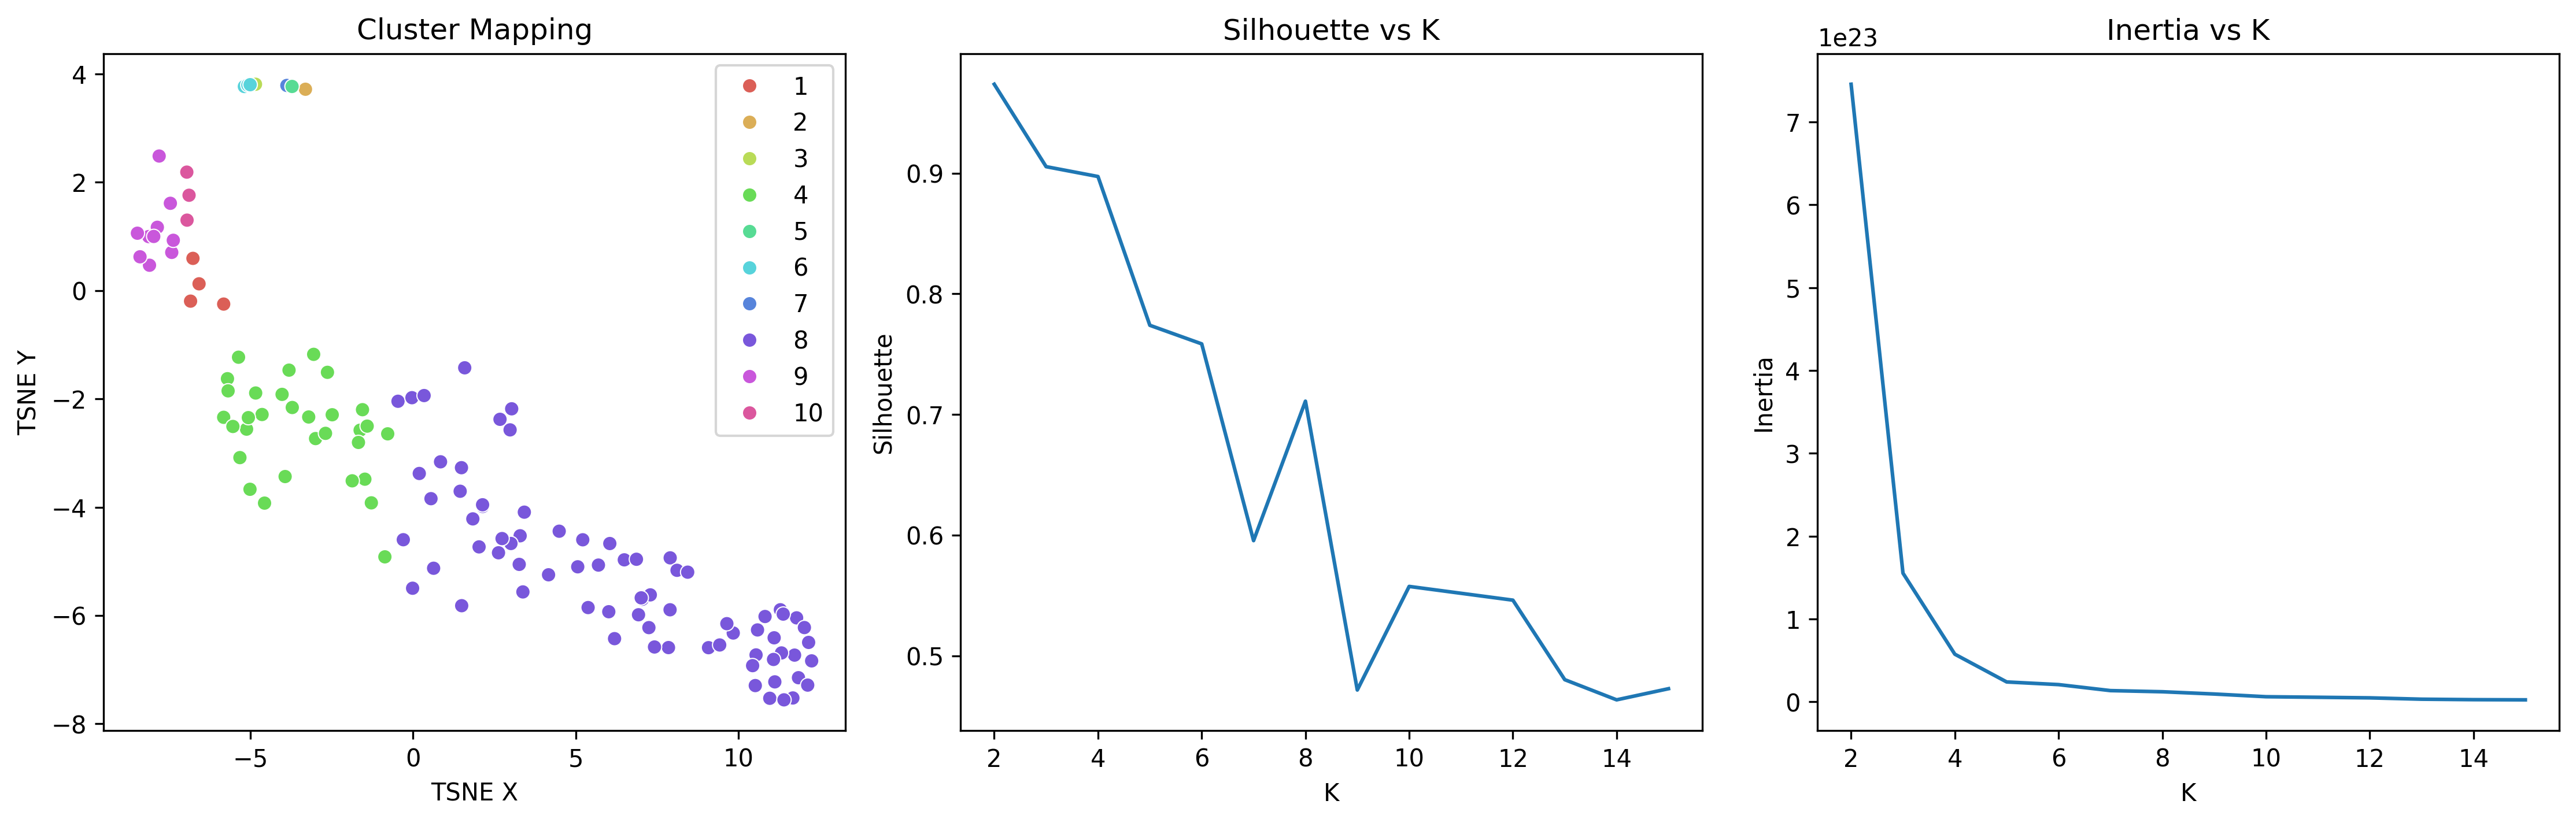

In [61]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5), dpi=300)

#Cluster Map
Kmap = sns.scatterplot(x='TSNE X', y='TSNE Y', hue='Cluster Label', palette=sns.color_palette("hls", 10), data=kvisual,legend="full", ax=axs[0])
Kmap.set(title= "Cluster Mapping")
Kmap.legend(loc= "upper right")
#Silhouette 
Silhouette_graph = sns.lineplot(x = karray, y = silhouette_array, ax=axs[1])
Silhouette_graph.set(xlabel= 'K', ylabel = 'Silhouette', title = 'Silhouette vs K')
#Inertia
Inertia_graph = sns.lineplot(x=karray, y= inertia_array, ax=axs[2])
Inertia_graph.set(xlabel = 'K', ylabel = 'Inertia', title = 'Inertia vs K')

plt.subplots_adjust(wspace=5.0) #Spacing for graphs
plt.tight_layout()
plt.show()

# **Conclusion**

This model has completed it's task of classifing nations, creating new insights, and sparking curiosity for social scientist. Humanitarians and international studies social scientist can use this model and data to learn more about how nations an be classified without using current labeling. As we can see from the three case studies pulled from the three model analysis, this model provides creative and innovative pairings that bring new views to light. From the 'Further Analysis' we can see that using specified varibales relating to specific fields of interest, for example, medical or economic, can help with the clustering. 

In terms of efficiency, the visuals provided show a clear color based grouping of clusters while the shilhouette and inertia show efficiency (lower values are optimal). To increase efficacy of the project, I would take a closer look at the variables and speak with specialists about the best variables to use to look at economic, medical, educational, etc standings. Additionally, it may be beneficial to look at how different models of standardization effect the model and the distance between points in the K-Means.
